In [126]:
#Load important LIB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas_profiling

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [127]:
#Read the train and test file
train = pd.read_excel("Data_Train.xlsx", parse_dates=[1,7])
test = pd.read_excel("Test_set.xlsx", parse_dates=[1])

In [128]:
#Remove the repeating columns
#Replace New Delhi with Delhi
train.drop_duplicates(keep=False,inplace=True)
train['Destination'].value_counts()
cleanup = {'New Delhi':'Delhi'}
train['Source'] = train['Source'].replace(cleanup,regex=True)
train['Destination'] = train['Destination'].replace(cleanup,regex=True)
train['Destination'].value_counts()
train['Source'].value_counts()

Delhi       4179
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [129]:
#This will show top 10 flight root
train['Route'].value_counts()[:10]

DEL → BOM → COK    2376
BLR → DEL          1520
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: Route, dtype: int64

Flight price for Bangalore Delhi , we can see huge hike during the new year period and during the initial period of june . Else everywhere , we can see the constant trend of price between the two destinations.

In [130]:
#now filter the dataset by root
def route_price_plot(route):
    flight_route = train['Route'] == route
    flight_route = train[flight_route]
    flight_route.head()
    flight_route.sort_values(by='Date_of_Journey',ascending=True,inplace=True)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    h1 = sns.pointplot(x=flight_route['Date_of_Journey'],y=flight_route['Price'],data=flight_route)

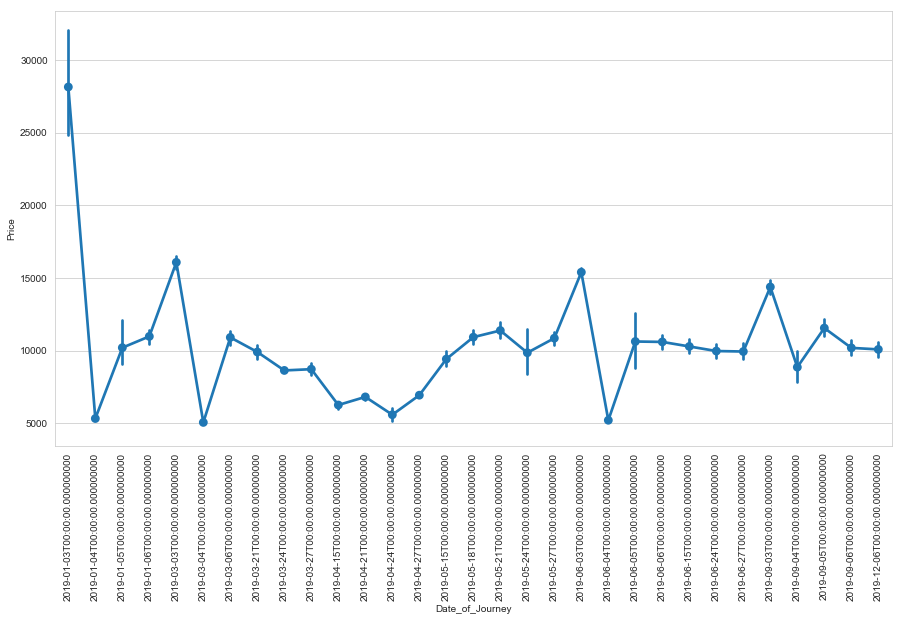

In [131]:
route_price_plot('DEL → BOM → COK')

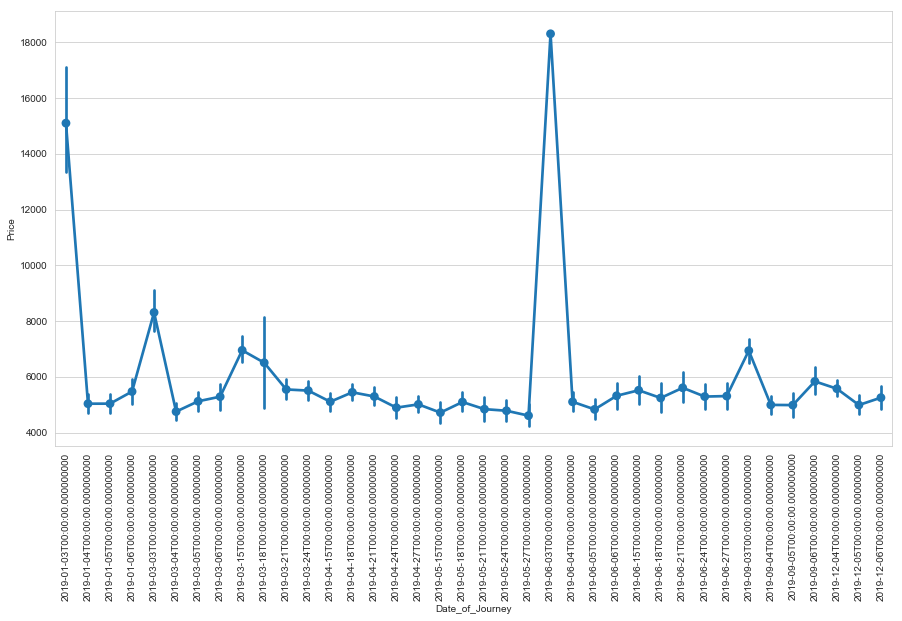

In [132]:
route_price_plot('BLR → DEL')

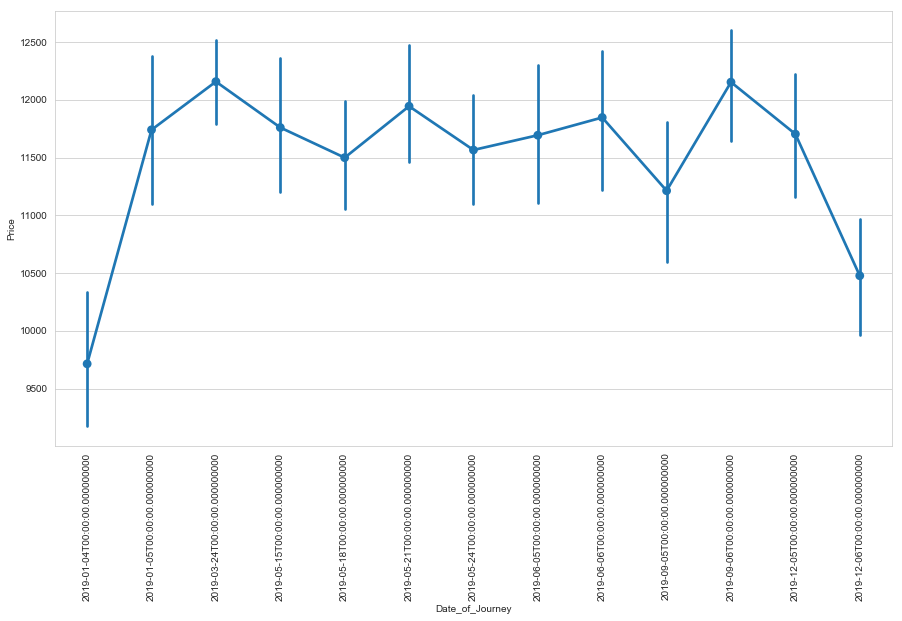

In [133]:
route_price_plot('CCU → BOM → BLR')

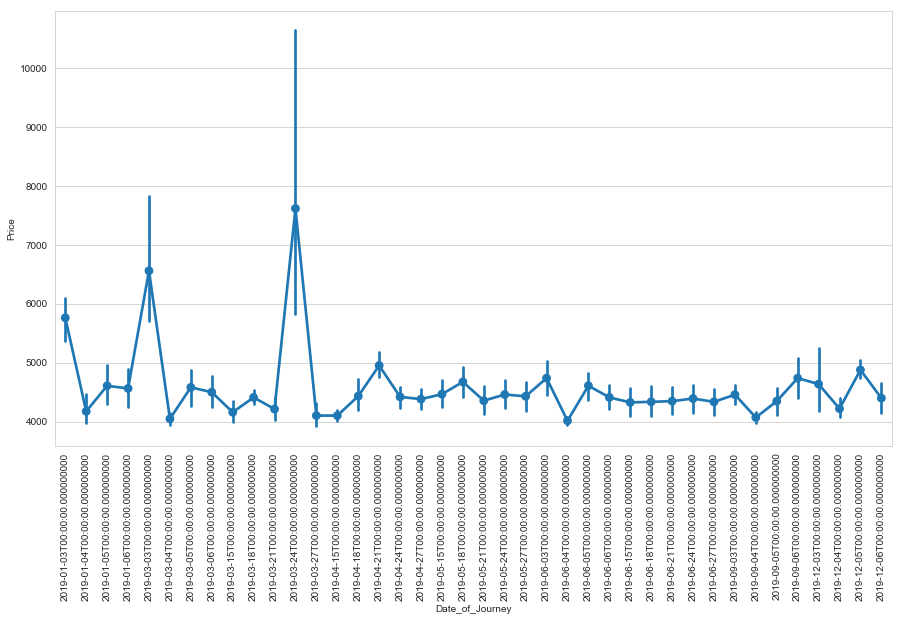

In [134]:
route_price_plot('CCU → BLR')

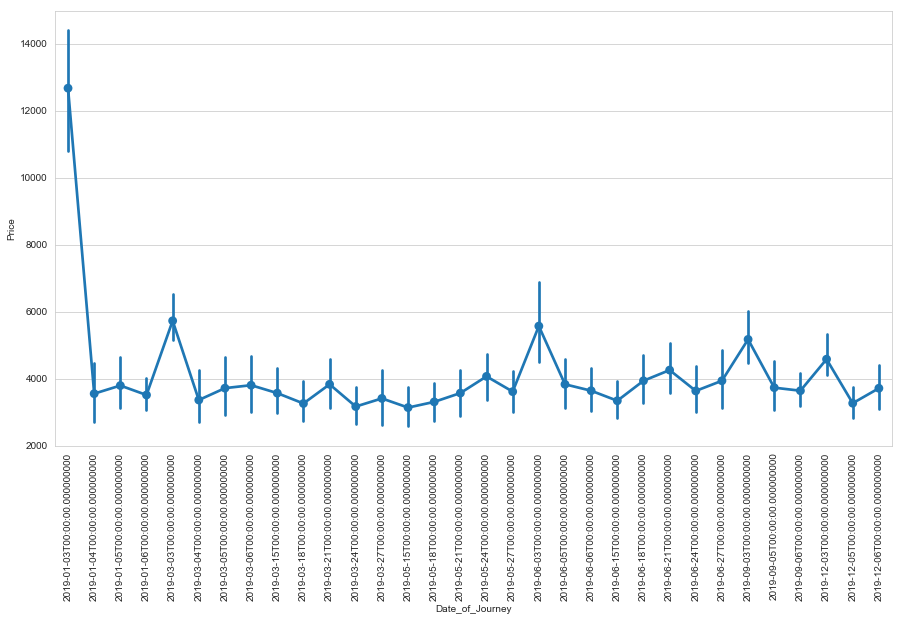

In [135]:
route_price_plot('BOM → HYD')

In [136]:
Delhi_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
118,Vistara,2019-12-06,Banglore,Delhi,BLR → DEL,07:00,09:40,2h 40m,non-stop,No info,4668
2988,SpiceJet,2019-12-06,Banglore,Delhi,BLR → DEL,09:30,12:20,2h 50m,non-stop,No info,4423
8297,Vistara,2019-12-06,Banglore,Delhi,BLR → DEL,19:30,22:15,2h 45m,non-stop,No info,4878
6109,Vistara,2019-12-06,Banglore,Delhi,BLR → DEL,21:00,23:50,2h 50m,non-stop,No info,4668
2610,Jet Airways,2019-12-06,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,In-flight meal not included,5769


In [137]:
def total_stops_price_plot(route):
    flight_route = train['Total_Stops'] == route
    flight_route = train[flight_route]
    flight_route.head()
    flight_route.sort_values(by='Date_of_Journey',ascending=True,inplace=True)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    h1 = sns.pointplot(x=flight_route['Date_of_Journey'],y=flight_route['Price'],data=flight_route)

In [138]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3459
2 stops     1141
3 stops       41
4 stops        1
Name: Total_Stops, dtype: int64

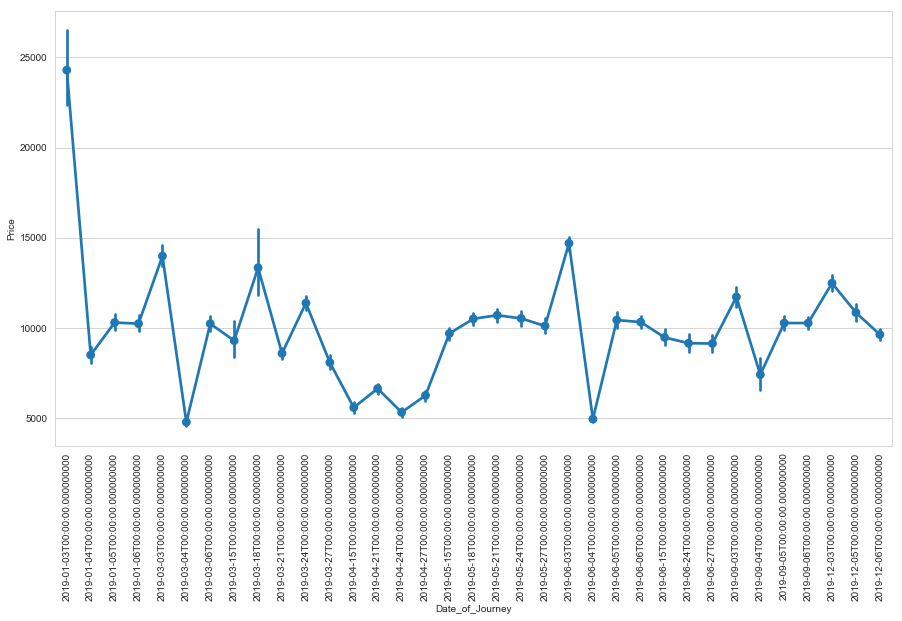

In [139]:
total_stops_price_plot('1 stop')

# price vs 2 stops

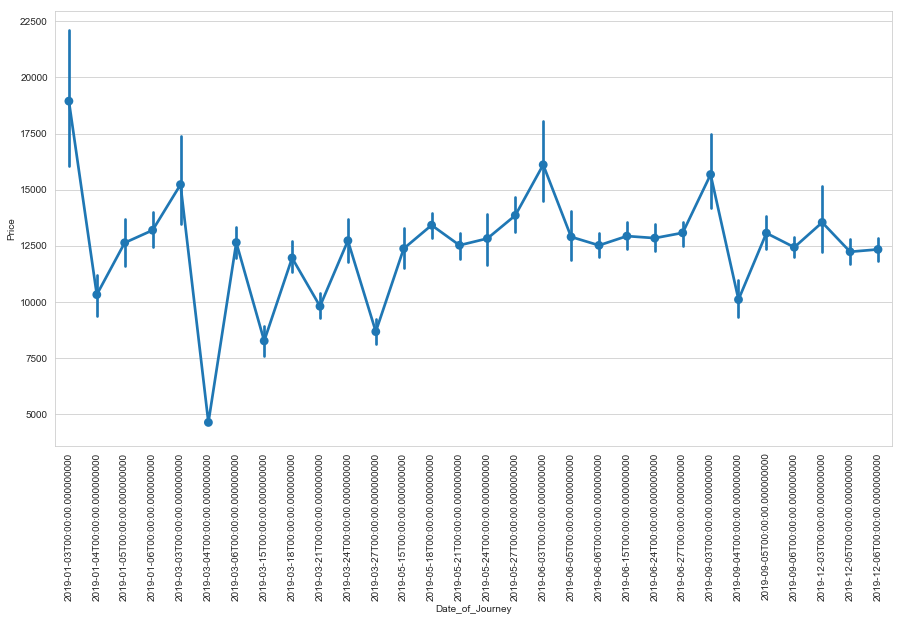

In [140]:
total_stops_price_plot('2 stops')

# price vs non stop

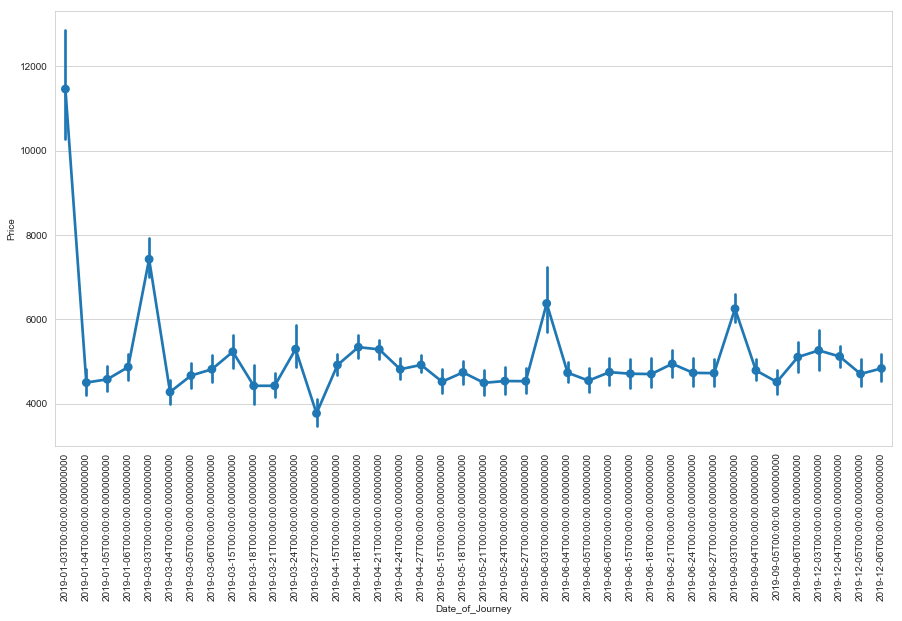

In [141]:
total_stops_price_plot('non-stop')

#Convert duration into meaning full sense 

In [142]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [168]:
#Convert duration into minutes
new = train["Duration"].str.split(" ", n = 1, expand = True)
#print(new[0])
print(new[0].isna().sum()
new[0] = new[0].str.replace(r'[^\d.]+', '')
new[0] = pd.to_numeric(new[0])
new[0] = new[0]*60
new[1] = new[1].str.replace(r'[^\d.]+', '')
#new[1] = new[1].replace('None',0)
new[1] = pd.to_numeric(new[1])
new[1] = new[1].fillna(0)
train['Duration_min'] = new[0] + new[1]


0          2
1          7
2         19
3          5
4          4
5          2
6         15
7         21
8         25
9          7
10        13
11         2
12         2
13        12
14         2
15        26
16         4
17        22
18        23
19        20
20         5
21        15
22         2
23         2
24        13
25        15
26         5
27         5
28         2
29         2
        ... 
10651    NaN
10652    NaN
10653    NaN
10654    NaN
10655    NaN
10656    NaN
10657    NaN
10658    NaN
10659    NaN
10660    NaN
10661    NaN
10662    NaN
10663    NaN
10664    NaN
10665    NaN
10666    NaN
10667    NaN
10668    NaN
10669    NaN
10670    NaN
10671    NaN
10674    NaN
10675    NaN
10676    NaN
10677    NaN
10678    NaN
10679    NaN
10680    NaN
10681    NaN
10682    NaN
Name: 0, Length: 10664, dtype: object


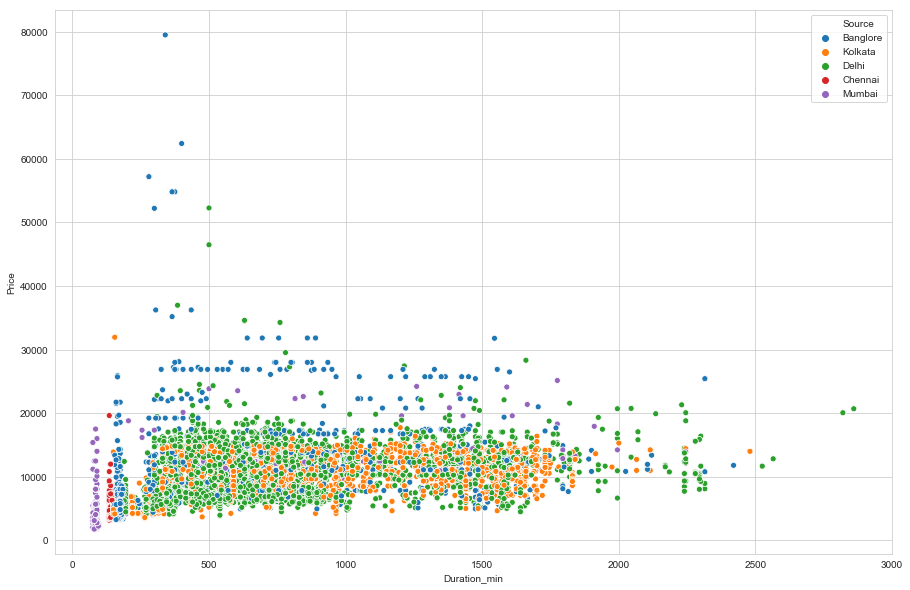

In [144]:
#Scatter plot
#From this graph it is clear Duration does not have correlation with prices
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='Duration_min',y='Price',data=train,hue='Source')

In [145]:
#Pre-process for Dept_Time
#As we need to convert it into categorical variable
new = train["Arrival_Time"].str.split(":", n = 1, expand = True)
new[0] = pd.to_numeric(new[0])
#Convert it into category
train['Arrival_cat'] = pd.cut(new[0],
                     bins=[0,6,12,18,24],
                     labels=["Early morning", "Morning", "Evening", "Night"])

In [146]:
#Pre-process for Arrival Time
#As we need to convert it into categorical variable
new = train["Dep_Time"].str.split(":", n = 1, expand = True)
new[0] = pd.to_numeric(new[0])
#Convert it into category
train['Dep_cat'] = pd.cut(new[0],
                     bins=[0,6,12,18,24],
                     labels=["Early morning", "Morning", "Evening", "Night"])

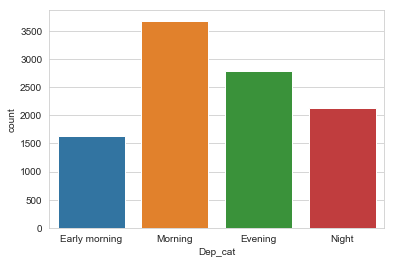

In [147]:
c1 = sns.countplot(train['Dep_cat'])

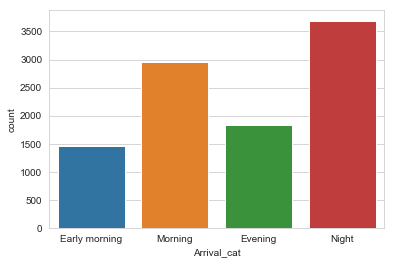

In [148]:
c1 = sns.countplot(train['Arrival_cat'])

# Feature engineering for time

In [149]:
#Feature engineering
#Feature engineering for Journeydate
column_1 = train['Date_of_Journey']

temp = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              #"hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              #"weekofyear": column_1.dt.weekofyear,
              #"dayofweek": column_1.dt.dayofweek,
              #"weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

train.reset_index(drop=True, inplace=True)
train = pd.concat([train,temp],axis=1)


In [150]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_min,Arrival_cat,Dep_cat,year,month,day,dayofyear,week,quarter
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,170.0,Early morning,Night,2019.0,3.0,24.0,83.0,12.0,1.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,445.0,Evening,Early morning,2019.0,1.0,5.0,5.0,1.0,1.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1140.0,Early morning,Morning,2019.0,9.0,6.0,249.0,36.0,3.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,325.0,Night,Evening,2019.0,12.0,5.0,339.0,49.0,4.0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,285.0,Night,Evening,2019.0,1.0,3.0,3.0,1.0,1.0


In [151]:
JourneyDate = train['Date_of_Journey']
train.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [152]:
target = train['Price']
del train['Price']

ValueError: cannot convert float NaN to integer

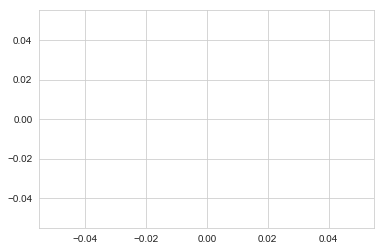

In [153]:
d1 = sns.distplot(train['Duration_min'])